In [1]:
d = [open('/usr/userfs/s/sjb577/scratch/output/cf.job.o253610.'+str(i), 'r') for i in range(1, 12)]

import csv
all_data = {}
i=0
polys = []

for c in d:
    polys.append(c.readline())

In [2]:
for c in d:
    all_data[polys[i]]= {'cf':[],'sum':[],'mean':[],'double mean':[]}
    reader = csv.reader(c)
    for row in reader:
        if len(row)<4:
            break
        all_data[polys[i]]['cf'].append(int(row[0]))
        all_data[polys[i]]['sum'].append(row[1])
        all_data[polys[i]]['mean'].append(float(row[2]))
        all_data[polys[i]]['double mean'].append(float(row[3]))
    i+=1

In [3]:
for c in d:
    c.close()

In [4]:
for p in polys:
    print(len(all_data[p]['cf']))

2904639
3341326
2895878
2896959
2893707
2895493
1353924
1068556
2892209
2894041
1826266


In [5]:
maxes={p:[] for p in polys}
prevMax = {p:0 for p in polys}
for p in polys:
    for cf in all_data[p]['cf']:
        prevMax[p] = max(cf, prevMax[p])
        maxes[p].append(prevMax[p])

In [12]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15.0, 8.0)


Populating the interactive namespace from numpy and matplotlib


In [72]:
def latex_poly(p):
    p = p.split()
    coeffs = p[3:]
    print(coeffs)
    text = coeffs[0][1:-1]
    if (coeffs[1][:-1]!='1'):
        text =  ' + ' +coeffs[1][:-1]+'x' + text
    else:
        text =  ' + ' +'x' + text
    print text
    for i in range(2,len(coeffs)):
        if (coeffs[i][:-1]!='0'):
            if (coeffs[i][:-1]!='1'):
                text =  ' + ' +coeffs[i][:-1]+'x^' + str(i) + text
            else:
                text =  ' + ' +'x^' + str(i) + text
    return "$"+ text[2:] +"$"

In [73]:
latex_poly(polys[5])

['[-1,', '-2,', '1,', '1]']
 + -2x-1


'$ x^3 + x^2 + -2x-1$'

In [8]:
def plot_alldata(s, polynomials = polys, start=0):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    plots= []
    for p in polynomials:
        ax.plot(all_data[p][s][start:], label=latex_poly(p))
    pyplot.legend(loc='upper right');
    ax.figure.show()

In [9]:
def plot_maxes(polynomials = polys, start=0):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    plots= []
    for p in polynomials:
        ax.plot(maxes[p][start:], label=latex_poly(p))
    pyplot.legend(loc='upper right');
    ax.figure.show()

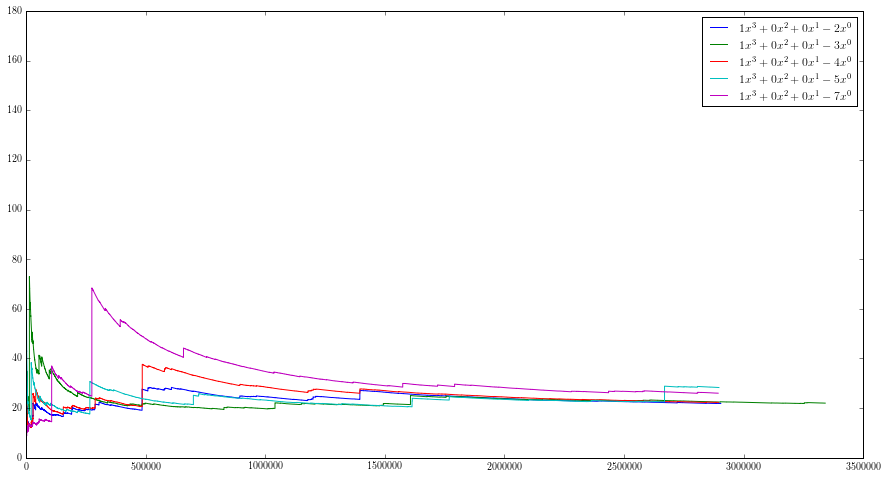

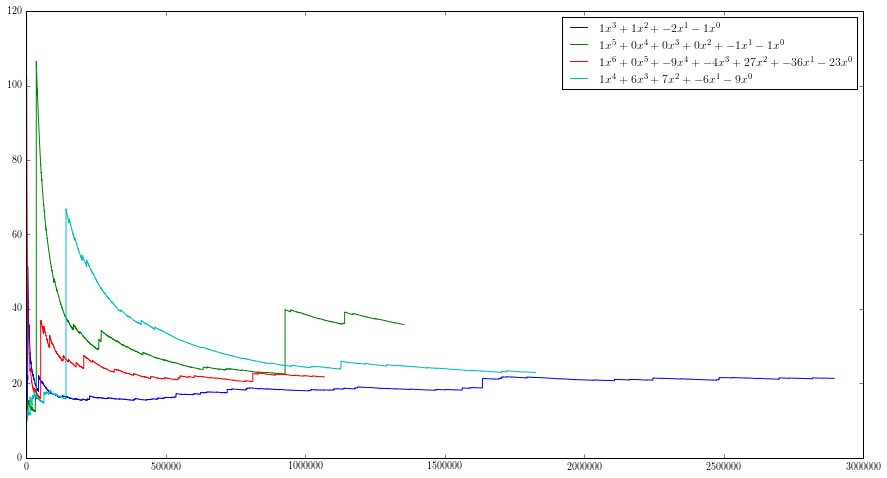

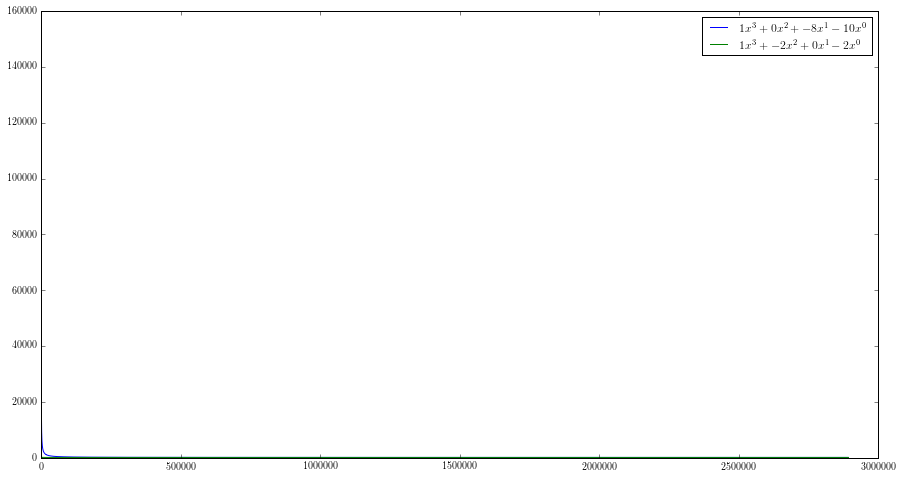

In [18]:
plot_alldata('mean', polynomials=polys[:5], start=10)
plot_alldata('mean', polynomials=polys[5:8]+polys[10:], start=10)
plot_alldata('mean', polynomials=polys[8:10], start=10)

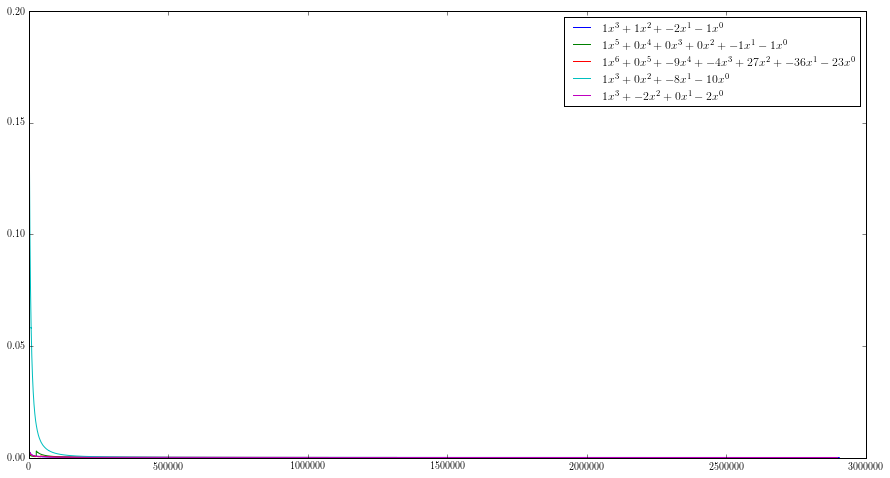

In [11]:
plot_alldata('double mean', polynomials=polys[5:],start=10000)

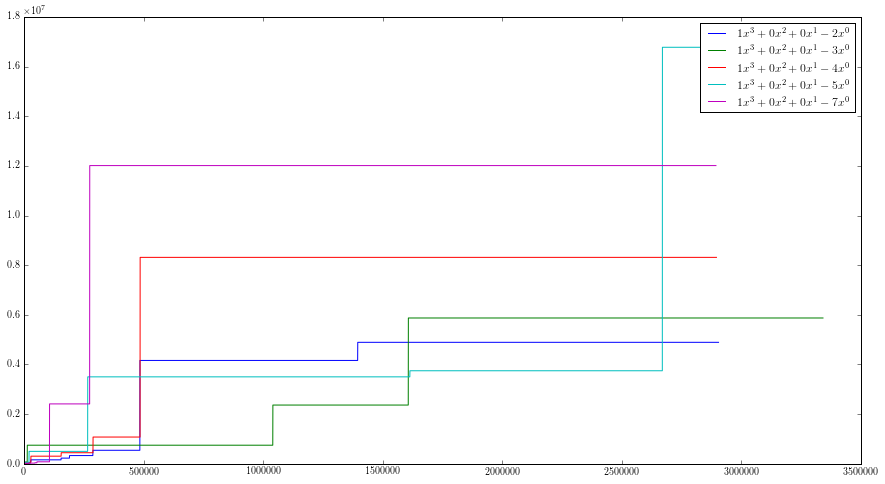

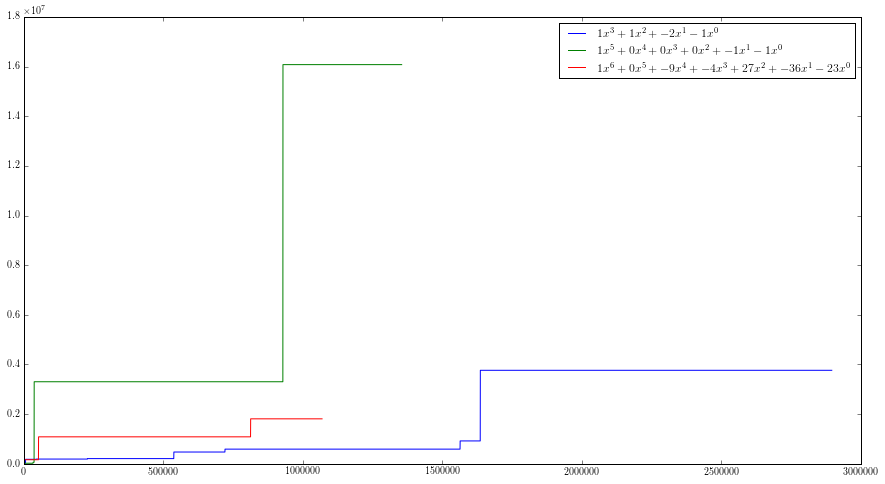

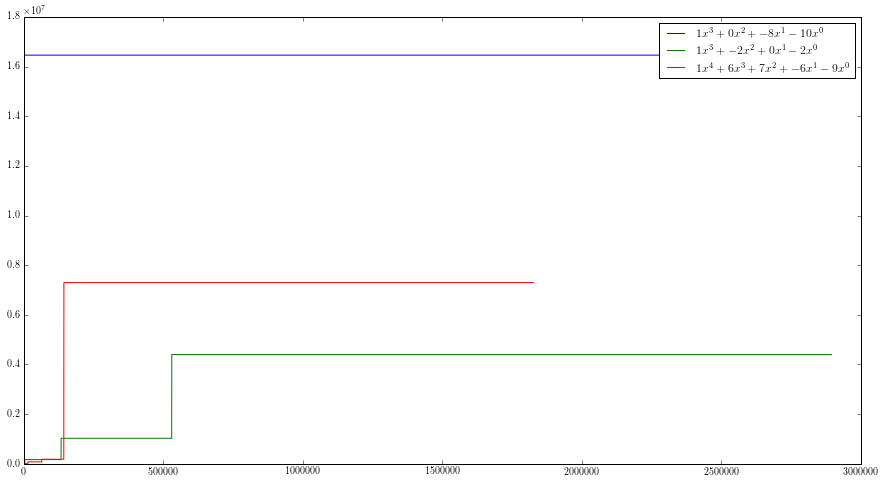

In [11]:
plot_maxes( polynomials=polys[:5], start=10)
plot_maxes( polynomials=polys[5:8], start=10)
plot_maxes( polynomials=polys[8:], start=10)

In [12]:
import sympy, re, pprint
x = sympy.symbols('x')
ps = []
for p in polys:
    p = re.sub("[^0-9\-]", ",",p).split(",")
    coeffs = [int(c) for c in p if c!='']
    counter = 0
    y = sympy.poly(0,x)
    for c in coeffs:
        y += sympy.poly(c*x**counter, x)
        counter +=1
    ps.append(y)

pprint.pprint([(p,sympy.discriminant(p)) for p in ps])

[(Poly(x**3 - 2, x, domain='ZZ'), -108),
 (Poly(x**3 - 3, x, domain='ZZ'), -243),
 (Poly(x**3 - 4, x, domain='ZZ'), -432),
 (Poly(x**3 - 5, x, domain='ZZ'), -675),
 (Poly(x**3 - 7, x, domain='ZZ'), -1323),
 (Poly(x**3 + x**2 - 2*x - 1, x, domain='ZZ'), 49),
 (Poly(x**5 - x - 1, x, domain='ZZ'), 2869),
 (Poly(x**6 - 9*x**4 - 4*x**3 + 27*x**2 - 36*x - 23, x, domain='ZZ'),
  67941730271232),
 (Poly(x**3 - 8*x - 10, x, domain='ZZ'), -652),
 (Poly(x**3 - 2*x**2 - 2, x, domain='ZZ'), -172),
 (Poly(x**4 + 6*x**3 + 7*x**2 - 6*x - 9, x, domain='ZZ'), 14400)]


In [7]:
from collections import Counter

c = {p : Counter(all_data[p]['cf']) for p in polys}

In [13]:
def export_most_common(polys):
    n=0
    t= [[0 for i in range(len(polys))] for i in range(10)]
    for p in polys:
        for i in c[p].most_common(10):
            t[i[0]-1][n]=i[1]*1.0/len(all_data[p]['cf'])
        n+=1
    numpy.savetxt(polys[0]+".csv", t, delimiter=' & ', fmt='%0.5f', newline=' \\\\\n')

In [14]:
export_most_common(polys[:5])
export_most_common(polys[5:8]+polys[10:])
export_most_common(polys[8:10])


In [15]:
for i in range(11):
    print(latex_poly(polys[i]),c[i][1]*1.0/len(all_data[polys[i]]['cf']),
          )

('$ 1x^3 + 0x^2 + 0x^1-2x^0$', 0.4149775583127542)
('$ 1x^3 + 0x^2 + 0x^1-3x^0$', 0.41510526060611863)
('$ 1x^3 + 0x^2 + 0x^1-4x^0$', 0.4154090745535551)
('$ 1x^3 + 0x^2 + 0x^1-5x^0$', 0.41542631428335713)
('$ 1x^3 + 0x^2 + 0x^1-7x^0$', 0.41498016212422334)
('$ 1x^3 + 1x^2 + -2x^1-1x^0$', 0.4148032822044467)
('$ 1x^5 + 0x^4 + 0x^3 + 0x^2 + -1x^1-1x^0$', 0.4151998191922146)
('$ 1x^6 + 0x^5 + -9x^4 + -4x^3 + 27x^2 + -36x^1-23x^0$', 0.4154026555463635)
('$ 1x^3 + 0x^2 + -8x^1-10x^0$', 0.41463186097546895)
('$ 1x^3 + -2x^2 + 0x^1-2x^0$', 0.41476330155654323)
('$ 1x^4 + 6x^3 + 7x^2 + -6x^1-9x^0$', 0.41544769491410344)


In [35]:
import heapq
def maxes_export(polys):
    t=[[0 for i in range(2*len(polys))] for i in range(10)]
    m=0
    for p in polys:
        a=numpy.array(all_data[p]['cf'])
        ind = np.argpartition(a, -10)[-10:]
        ind=sort(ind)
        n=0
        for i in ind:
            t[n][2*m]=i
            t[n][2*m+1]=a[i]
            n+=1
        m+=1
    numpy.savetxt("max"+polys[0]+".csv", t, delimiter=' & ', fmt='%0i', newline=' \\\\\n')
        

In [37]:
maxes_export(polys[0:2]+polys[3:5])
maxes_export(polys[5:8]+polys[10:])
maxes_export(polys[8:10])